In [79]:
# Load in our libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from pandas.api.types import is_string_dtype
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.utils.multiclass import unique_labels

# PREPROCESSING

In [3]:
dataset = pd.read_csv("estadistical.csv")

In [8]:
x = dataset.drop("Receive/ Not receive credit ",axis=1)
y = dataset["Receive/ Not receive credit "]

In [38]:
cat_mask = x.dtypes==object

cat_cols = x.columns[cat_mask].tolist()

In [39]:
le = preprocessing.LabelEncoder()

x[cat_cols] = x[cat_cols].apply(lambda col: le.fit_transform(col))

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)

# KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [65]:
preKnn = neigh.predict(xtest)

In [66]:
accuracy_score(ytest, preKnn)

0.7166666666666667

# RANDOM FOREST

In [61]:
forest = RandomForestClassifier(max_depth=2, random_state=0)
forest.fit(xtrain, ytrain)

/home/sophia/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [63]:
pred_forest = forest.predict(xtest)

In [64]:
accuracy_score(ytest,pred_forest)

0.7233333333333334

# LOGISTIC REGRESSION

In [69]:
logRegr = LogisticRegression(random_state=0).fit(xtrain, ytrain)

/home/sophia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
pred_logReg = logRegr.predict(xtest)

In [71]:
accuracy_score(ytest,pred_logReg)

0.76

Confusion matrix, without normalization
[[182  34]
 [ 38  46]]


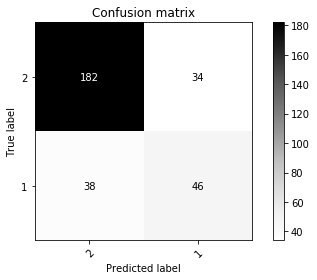

In [78]:
plot_confusion_matrix(ytest, pred_logReg, classes= ytrain, normalize=False,
                      title='Confusion matrix')

plt.show()

# SVM

In [80]:
svm = SVC(gamma='auto')
svm.fit(xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [81]:
pred_svm = svm.predict(xtest)

In [82]:
accuracy_score(ytest, pred_svm)

0.72

# CONFUSION MATRIX

In [73]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)